In [1]:
import matplotlib.pyplot as plt
import argparse

In [2]:
def init_parser():
    parser = argparse.ArgumentParser()
    parser.add_argument("--path")
    return parser

In [3]:
def print_plt(x_10, y_10, x_100, y_100, type):
    plt.plot(x_10, y_10, color = 'green', label = '10')
    plt.plot(x_100, y_100, color = 'blue' , label = '100')

    plt.margins(0)
    plt.xlabel("time")
    plt.ylabel(type)
    plt.title(type)
    plt.tick_params(axis="both")
    plt.legend()
    plt.show()

In [4]:
def handle_cwnd(f):
    x = []
    y = []
    time_zero = 0
    isFirst = False
    for line in f:
        line = line.strip('\n')
        if(line.find('cwnd')):
            line = line.split(',',1)
            time = line[0]
            line = line[1].split('cwnd:',1)
            if(len(line) > 1):
                if(isFirst == False):
                    time_zero = time
                    isFirst = True
                line = line[1].split(' ')
                cwnd = line[0]
                x.append(float(time)-float(time_zero))
                y.append(int(cwnd))
    return x,y

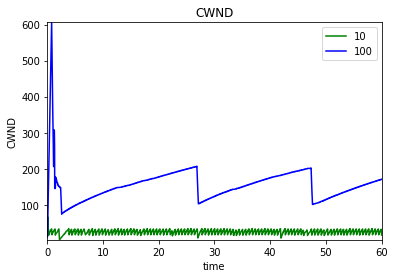

<function TextIOWrapper.close()>

In [5]:
    input_10_txt = "data/qlen-10/cwnd.txt"
    input_100_txt = "data/qlen-100/cwnd.txt"
    fd_10 = open(input_10_txt)
    fd_100 = open(input_100_txt)
    x_10, y_10 = handle_cwnd(fd_10)
    x_100, y_100 = handle_cwnd(fd_100)
    print_plt(x_10,y_10,x_100,y_100, "CWND")
    fd_10.close
    fd_100.close

In [6]:
def handle_qlen(f):
    x = []
    y = []
    time_zero = 0
    isFirst = False
    for line in f:
        line = line.strip('\n')
        line = line.split(', ',1)
        if(len(line) > 1):
            time = line[0]
            if(isFirst == False):
                time_zero = time
                isFirst = True
            qlen = line[1]
            x.append(float(time) - float(time_zero))
            y.append(int(qlen))
    return x,y

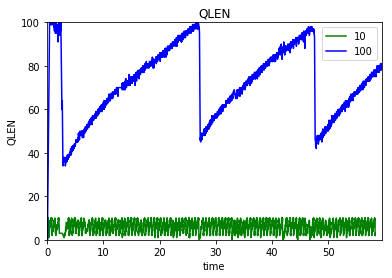

<function TextIOWrapper.close()>

In [7]:
    input_10_txt = "data/qlen-10/qlen.txt"
    input_100_txt = "data/qlen-100/qlen.txt"
    fd_10 = open(input_10_txt)
    fd_100 = open(input_100_txt)
    x_10, y_10 = handle_qlen(fd_10)
    x_100, y_100 = handle_qlen(fd_100)
    print_plt(x_10,y_10,x_100,y_100, "QLEN")
    fd_10.close
    fd_100.close

In [8]:
def handle_rtt(f):
    x = []
    y = []
    time_zero = 0
    isFirst = False
    for line in f:
        line = line.strip('\n')
        if(line.find('time:')):
            line = line.split(',',1)
            time = line[0]
            line = line[1].split('time=',1)
            if(len(line) > 1):
                if(isFirst == False):
                    time_zero = time
                    isFirst = True
                line = line[1].split(' ')
                rtt = line[0]
                x.append(float(time)-float(time_zero))
                y.append(float(rtt))
    return x,y

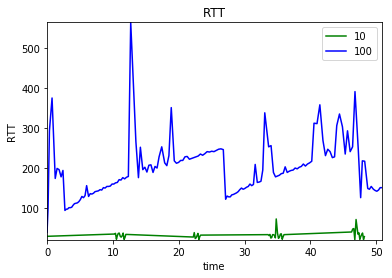

<function TextIOWrapper.close()>

In [9]:
    input_10_txt = "data/qlen-10/rtt.txt"
    input_100_txt = "data/qlen-100/rtt.txt"
    fd_10 = open(input_10_txt)
    fd_100 = open(input_100_txt)
    x_10, y_10 = handle_rtt(fd_10)
    x_100, y_100 = handle_rtt(fd_100)
    print_plt(x_10,y_10,x_100,y_100, "RTT")
    fd_10.close
    fd_100.close